# Its Maggi !!

In [1]:
#import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#load the data
survey_data=pd.read_csv("Maggi-Survey .csv")
survey_data

,Timestamp,Mention your age.,How often do you have Maggi?,What's your quantity of consumption at a time?,Which noodle brand would you prefer after Maggi?,Do you add other ingredients to your Maggi?,"If Yes, then which ingredients?",Do you consider Maggi noodles as your Go-To meal?,Did Lead controversy brought decline in your consumption pattern of Maggi?,Do you find nutritive value in Maggi?,Would you prefer a pack of quantity more than 1 pkt and less than 2 pkts i.e. the pack costing Rs.15/- for a single meal?,Do you prefer buying Maggi Masala-ae-Magic with Maggi noodles?,Would you want Maggi to increase its tastemaker size at the cost of increased price?
0,2021/06/07 9:38:40 PM GMT+5:30,18-26,Once in a week,1 PKT,Yippee,Yes,"Sauces;Spices(oregano, chili flakes, etc.)",Yes,"No, It's still the same",No,Yes,Yes,Yes
1,2021/06/07 9:43:34 PM GMT+5:30,18-26,Once in two weeks,1 PKT,Yippee,Yes,"Veggies;Sauces;Spices(oregano, chili flakes, e...",Yes,"Yes, It did",No,No,No,Yes
2,2021/06/07 9:44:47 PM GMT+5:30,18-26,Once in two weeks,2 PKTS,Yippee,Yes,"Spices(oregano, chili flakes, etc.);Other",No,"Yes, It did",No,No,Yes,Yes
3,2021/06/07 9:45:18 PM GMT+5:30,18-26,Less often,2 PKTS,Yippee,Yes,"Veggies;Spices(oregano, chili flakes, etc.);Cr...",No,"Yes, It did",No,No,Yes,Yes
4,2021/06/07 9:45:22 PM GMT+5:30,18-26,More than once in a week,2 PKTS,Yippee,No,Cream/Cheese,Yes,"No, It's still the same",No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,2021/06/10 12:05:32 PM GMT+5:30,18-26,Less often,2 PKTS,Yippee,No,NaN,Yes,"No, It's still the same",No,Yes,Yes,Yes
106,2021/06/10 12:14:06 PM GMT+5:30,18-26,Once in a month,2 PKTS,Yippee,Yes,"Veggies;Spices(oregano, chili flakes, etc.)",Yes,"No, It's still the same",No,Yes,Yes,Yes
107,2021/06/10 12:22:22 PM GMT+5:30,18-26,More than once in a week,2 PKTS,Top Ramen,Yes,"Veggies;Sauces;Spices(oregano, chili flakes, e...",Yes,"No, It's still the same",Yes,Yes,Yes,Yes
108,2021/06/10 12:46:14 PM GMT+5:30,18-26,Once in a month,1 PKT,Top Ramen,Yes,"Veggies;Spices(oregano, chili flakes, etc.);Cr...",No,"Yes, It did",No,Yes,Yes,No


In [3]:
#Copy the data into a new variable
maggi_data=survey_data.copy()


In [4]:
#Display the column names
maggi_data.columns.values

array(['Timestamp', 'Mention your age.', 'How often do you have Maggi?',
       "What's your quantity of consumption  at a time?",
       'Which noodle brand would you prefer after Maggi?',
       'Do you add other ingredients to your Maggi?',
       'If Yes, then which ingredients?',
       'Do you consider Maggi noodles as your Go-To meal?  ',
       'Did Lead controversy brought decline in your consumption pattern of Maggi?',
       'Do you find nutritive value in Maggi?',
       'Would you prefer a pack of quantity more than 1 pkt and less than 2 pkts i.e. the pack  costing Rs.15/- for a single meal?',
       'Do you prefer buying Maggi Masala-ae-Magic with Maggi noodles? ',
       'Would you want Maggi to increase its tastemaker size at the cost of increased price?  '],
      dtype=object)

## Preprocessing 

In [5]:
#Drop the "Timestamp" column
maggi_data=maggi_data.drop('Timestamp', axis=1)

In [6]:
#Create a list object containing the modified names for columns
column_names=['age','number_of_times','consumption(in pkt)','competitors','add_ingredients','ingredients','go_to_meal','effect_of_lead','nutritive_value','rs15pack','masala_magic','inc_masala']

In [7]:
#Create the list with keys as old column names and values as corresponding new names.
names=dict()
for i in range(len(column_names)):
    names[maggi_data.columns.values[i]]=column_names[i]

In [8]:
#Rename the column
maggi_data=maggi_data.rename(columns=names)

In [9]:
#Mapping the values of "number of times" column from 1-5 accordingly going from lower conumption to higher consumption
maggi_data["number_of_times"]=maggi_data["number_of_times"].map({"Less often":1,"Once in a month":2,"Once in two weeks":3,"Once in a week":4,"More than once in a week":5})

In [10]:
#Removing PKT from the values and mapping "More than 2 PKTS" with "3" in the "consumption(in pkt)" column
maggi_data["consumption(in pkt)"]=maggi_data["consumption(in pkt)"].map({"1 PKT":1,"2 PKTS":2,"More than 2 PKTS":3})

## About Respondents

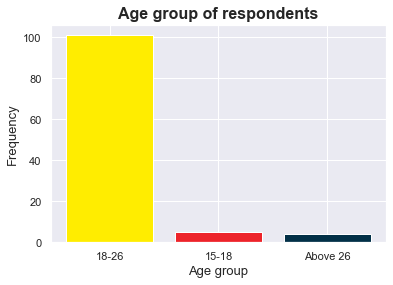

In [11]:
# Bar chart showing the distrinution of age groups.
plt.bar(maggi_data['age'].value_counts().index ,maggi_data['age'].value_counts().values, color=['#ffed00',"#ed232a",'#023047'])
plt.xlabel('Age group', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Age group of respondents', fontsize=16, fontweight="bold")
plt.show()

More than 90% of the respondents belong to the age group of 18-26 which are mostly college going students.

## Exploartory Data Analysis

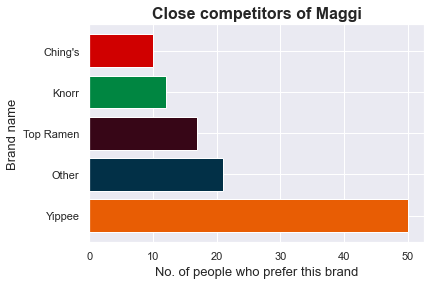

In [12]:
#Bar chart showing top compettors of Maggi 
plt.barh(maggi_data['competitors'].value_counts().index, maggi_data['competitors'].value_counts().values, color=['#e85d04','#023047','#370617','#008641','#d00000'])
plt.xlabel('No. of people who prefer this brand', fontsize=13)
plt.ylabel('Brand name', fontsize=13)
plt.title('Close competitors of Maggi', fontsize=16, fontweight="bold")
plt.show()

Yippee seems to be the closest competitor of Maggi among other brands with around 45% of the people preferring Yippee after Maggi.

Text(0.5, 1.0, 'Is Maggi prefered with added ingredients ?')

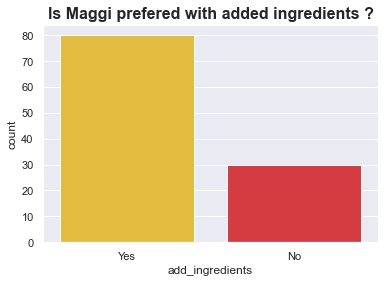

In [13]:
#Bar chart showing the no of people who consider/dont't consider maggi as complete meal
sns.countplot(x=maggi_data['add_ingredients'], data= maggi_data ,palette=["#ffc922",'#ed232a']).set_title('Is Maggi prefered with added ingredients ?', fontdict={'fontsize':16,'fontweight': 'bold'})

More than 70% of the people prefer adding additional ingredients in their Maggi, this shows people experimenting with and cutomizing Maggi according to their own taste.

In [14]:
#Top 2 ingredients that people prefer with maggi noodles
ingredients=[]
for i in range(maggi_data["ingredients"].shape[0]):
    a=str(maggi_data["ingredients"][i]).split(";")
    ingredients+=a
ingredients_series=pd.Series(ingredients)
print(ingredients_series.value_counts().head(2))

Spices(oregano, chili flakes, etc.)    62
Veggies                                54
dtype: int64


Spices like oregano & chili flakes, and Veggies comes out to be the top 2 ingredients prefered by people along with their Maggi. This suggests Maggi can come up with flavors similar to these, to make their cutomers more happy.

Text(0.5, 1.0, 'Has consumption declined after the Lead Controversy with Maggi?')

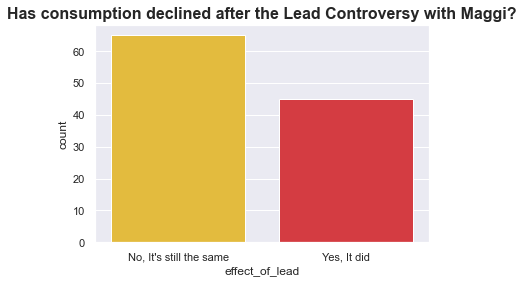

In [15]:
#Bar chart showing the the no. of people whose consumption declined/didn't decline after 2015 lead controversy. 
sns.countplot(x=maggi_data['effect_of_lead'], data= maggi_data ,palette=["#ffc922",'#ed232a']).set_title('Has consumption declined after the Lead Controversy with Maggi?',fontdict= { 'fontsize': 16, 'fontweight':'bold'})

The consumption has remained same for majority of people as it was before the lead controversy with Maggi in 2015.

In [16]:
#create a dataframe for stacked area chart
nutritive_value=pd.DataFrame()
#create a column containing possible values for 'no_of_times' column
nutritive_value['How_Often']=np.sort(maggi_data['number_of_times'].unique())

In [17]:
#create a list containing the no. of people who finds nutritive value in maggi noodles and consumes it different no. of times.
yes_value=[]
for i in np.sort(maggi_data['number_of_times'].unique()):
    yes_value.append(np.argwhere((maggi_data['number_of_times'].to_numpy()==i) & (maggi_data['nutritive_value'].to_numpy()=='Yes')).shape[0])

In [18]:
#create a list containing the no. of people who doesn't find nutritive value in maggi noodles and consumes it different no. of times.
no_value=[]
for i in np.sort(maggi_data['number_of_times'].unique()):
    no_value.append(np.argwhere((maggi_data['number_of_times'].to_numpy()==i) & (maggi_data['nutritive_value'].to_numpy()=='No')).shape[0])

In [19]:
#Add the above two list as separate columns in "nutritive value" dataframe.
nutritive_value['Yes']= yes_value
nutritive_value['No']= no_value

In [20]:
nutritive_value

,How_Often,Yes,No
0,1,0,22
1,2,3,16
2,3,2,25
3,4,2,24
4,5,4,12


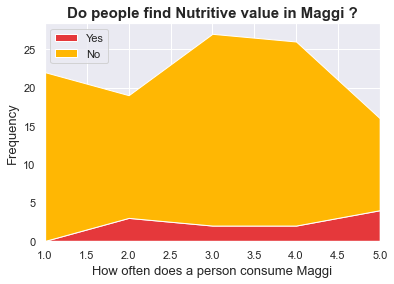

In [21]:
#Stacked Area Chart showing the frequency of people who consumes maggi noodles different no. of times stacked by whether they
#nutritive_value in it.
plt.stackplot(nutritive_value['How_Often'],nutritive_value['Yes'],nutritive_value['No'], colors =["#e5383b","#FFB703"])
plt.legend(labels=['Yes','No'], loc="upper left")
plt.xlim((1,5))
plt.title("Do people find Nutritive value in Maggi ?",fontsize=15, fontweight='bold')
plt.xlabel("How often does a person consume Maggi", fontsize=13)
plt.ylabel("Frequency", fontsize=13)
plt.show()

The graph compares how often a person consumes Maggi and whether or not they find any nutritive value in Maggi. It suggests that people who don't find any nutritive value in Maggi either don't consume it or have it very rarely. But at the same time we see that the people who consumes Maggi quite often, also don't find any nutritive value in Maggi. Although there are some people who find it nutritious but their propotion is almost imperceptible.

The above 2 graphs suggested how people prioritise Taste over Health. Even though they find the product less healthy and safe, their consumption level didn't decline much.

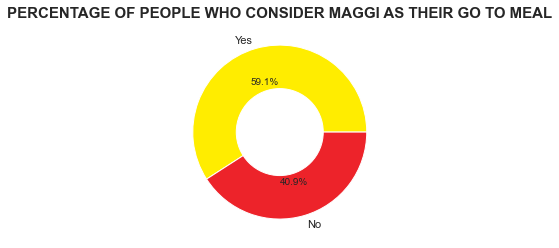

In [22]:
#Doughnut Chart showing the percentage of people who consider maggi as their go to meal.

colors=["#ffed00","#ed232a"]
plt.pie(maggi_data['go_to_meal'].value_counts().values,colors=colors,autopct='%1.1f%%',labels=maggi_data['go_to_meal'].value_counts().index)
centre_circle=plt.Circle((0,0),0.50,fc="white")
fig=plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("PERCENTAGE OF PEOPLE WHO CONSIDER MAGGI AS THEIR GO TO MEAL",fontsize="15",fontweight="bold")
plt.show()

Yayyy!! Maggi has become the Go-To-Meal for around 60% of the people consuming it.

## Hypotheses Testing

The problem is to test that the two attributes under consideration i.e. "inc_masala" and 'masala_magic' are independent or not.<br>
Therefore Test of Independence of Attributes need to be used.

Null Hypotheses(H_0): Attributes are independent<br>
Alternative Hypotheses(H_1): Attributes are not independent<p>
Level of Significance(alpha)=0.05


In [23]:
#create a contingency table for 'inc_masala' and 'masala_magic'
data_crosstab = pd.crosstab(maggi_data['inc_masala'], maggi_data['masala_magic'], 
                               margins = False)
print(data_crosstab)

masala_magic  No  Yes
inc_masala           
No            21   20
Yes           24   45


In [52]:
#Performing chi square test to test the independence of attributes
from scipy.stats import chi2_contingency
from scipy.stats import chi2
stat, p, dof, expected = chi2_contingency(data_crosstab)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))


dof=1
[[16.77272727 24.22727273]
 [28.22727273 40.77272727]]
probability=0.950, critical=3.841, stat=2.235
significance=0.050, p=0.135


Since p value(0.135) is greater than level of significance(0.05), null hyopotheses may be accepted.<br>
There is not enough statistical evidence to conclude that Attributes are dependent.<p>
Therefore there is no relation between whether a person wants tastemaker size to be increased and if he/she buys maggi masala-ae-magic with maggi noodles.

Text(0.5, 1.0, 'Do people want Maggi to increase its tastemaker size at the cost of increased prices?')

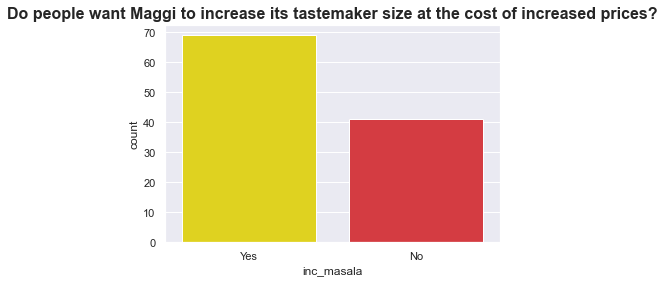

In [25]:
#Bar chart showiwng the frequency of people who want/doesn't want Maggi to increase its taste maker size.
sns.countplot(x=maggi_data['inc_masala'], data= maggi_data ,palette=["#ffed00",'#ed232a']).set_title('Do people want Maggi to increase it''s tastemaker size at the cost of increased prices?',fontdict= { 'fontsize': 16, 'fontweight':'bold'})

Yes, people want Maggi to increase its Tastemaker size. These people are also willing to pay extra price.
However there are around 38% of people who might or might not want Maggi to increase the size of its tastemaker but they defenitely don't want Maggi to increase cost.

## Cluster Analysis

In [26]:
#Import the KMeans module so we can perform k-means clustering with sklearn
from sklearn.cluster import KMeans

In [27]:
maggi_data

,age,number_of_times,consumption(in pkt),competitors,add_ingredients,ingredients,go_to_meal,effect_of_lead,nutritive_value,rs15pack,masala_magic,inc_masala
0,18-26,4,1,Yippee,Yes,"Sauces;Spices(oregano, chili flakes, etc.)",Yes,"No, It's still the same",No,Yes,Yes,Yes
1,18-26,3,1,Yippee,Yes,"Veggies;Sauces;Spices(oregano, chili flakes, e...",Yes,"Yes, It did",No,No,No,Yes
2,18-26,3,2,Yippee,Yes,"Spices(oregano, chili flakes, etc.);Other",No,"Yes, It did",No,No,Yes,Yes
3,18-26,1,2,Yippee,Yes,"Veggies;Spices(oregano, chili flakes, etc.);Cr...",No,"Yes, It did",No,No,Yes,Yes
4,18-26,5,2,Yippee,No,Cream/Cheese,Yes,"No, It's still the same",No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...
105,18-26,1,2,Yippee,No,NaN,Yes,"No, It's still the same",No,Yes,Yes,Yes
106,18-26,2,2,Yippee,Yes,"Veggies;Spices(oregano, chili flakes, etc.)",Yes,"No, It's still the same",No,Yes,Yes,Yes
107,18-26,5,2,Top Ramen,Yes,"Veggies;Sauces;Spices(oregano, chili flakes, e...",Yes,"No, It's still the same",Yes,Yes,Yes,Yes
108,18-26,2,1,Top Ramen,Yes,"Veggies;Spices(oregano, chili flakes, etc.);Cr...",No,"Yes, It did",No,Yes,Yes,No


In [28]:
#Create a dataframe that contains 'ExpenseRating' and 'FieldRating' columns
cluster_df = pd.DataFrame({'consumption(in pkt)':maggi_data['consumption(in pkt)'], 'number_of_times':maggi_data['number_of_times']})
cluster_df

,consumption(in pkt),number_of_times
0,1,4
1,1,3
2,2,3
3,2,1
4,2,5
...,...,...
105,2,1
106,2,2
107,2,5
108,1,2


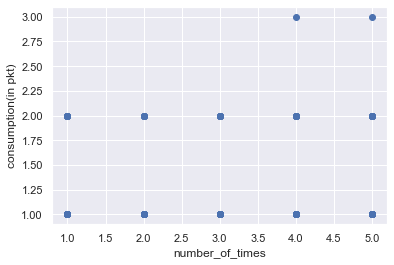

In [29]:
#Plotting the data using scatter plot
plt.scatter(cluster_df['number_of_times'],cluster_df['consumption(in pkt)']) 

plt.xlabel('number_of_times')
plt.ylabel('consumption(in pkt)')
plt.show()

In [30]:
# Create an empty list
wcss=[]

# Create all possible cluster solutions with a loop
for i in range(1,7):
    # Cluster solution with i clusters
    kmeans = KMeans(i)
    # Fit the data
    kmeans.fit(cluster_df)
    # Find WCSS for the current iteration
    wcss_iter = kmeans.inertia_
    # Append the value to the WCSS list
    wcss.append(wcss_iter)
wcss

[223.87272727272727,
 78.47578649699541,
 46.72009291521487,
 36.52403736614263,
 24.035942128047388,
 17.928799270904534]

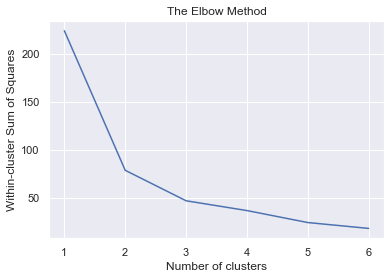

In [31]:
# Create a variable containing the numbers from 1 to 6, so we can use it as X axis of the future plot
number_clusters = range(1,7)
# Plot the number of clusters vs WCSS
plt.plot(number_clusters,wcss)
# Name the graph
plt.title('The Elbow Method')
# Name the x-axis
plt.xlabel('Number of clusters')
# Name the y-axis
plt.ylabel('Within-cluster Sum of Squares')
plt.show()

We want WCSS to be as low as possible while we can still have small no. of clusters so we could interpret them.<br>
In the above graph, we are getting two elbow points i.e. at 2 and 3<br>
3 is the biggest no. of cluster for which we are still getting the significant decrease in WCSS. Thereafter there is almost no improvement.<p>
So we will go with 3 cluster solution. 

In [32]:
# Create an object (which we would call kmeans)
kmeans = KMeans(3)
#  Fit the input data, i.e. cluster the data in cluster_df in 3 clusters
kmeans.fit(cluster_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Text(0.5, 1.0, 'Consumption Analysis')

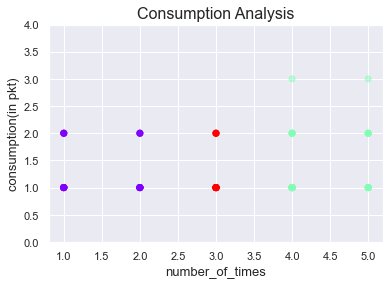

In [33]:
#Create a copy of 'cluster_df' dataframe 
clusters = cluster_df.copy() 
#Create a new column, containing the predicted clusters for each observation.
clusters['cluster_pred']=kmeans.fit_predict(cluster_df)
## Plot the data using the 'number_of_times' and 'consumption(in pkt)'
# c (color) is an argument which could be coded with a variable 
# The variable in this case has values 0,1,2, indicating to plt.scatter, that there are three colors (0,1,2)
# All points in cluster 0 will be the same colour, all points in cluster 1 - another one, etc.
# cmap is the color map
plt.scatter(clusters['number_of_times'],clusters['consumption(in pkt)'],c=clusters['cluster_pred'],cmap='rainbow', alpha=0.5)
plt.xlabel('number_of_times',fontsize=13)
plt.ylim(0,4)
plt.ylabel('consumption(in pkt)',fontsize=13)
plt.title("Consumption Analysis", fontsize=16)


**1st cluster** (People who consume maggi noodles less often and consume not more than 2 packs at a time): *Dissatisfied Customers* <br>
**2nd cluster** (People who consume maggi noodles once in two weeks and consume not more than 2 packs at a time): *Stable Customers*<br>
**3rd cluster** (People who consume maggi noodles quite often): *Best Customers*

In [34]:
#Create a dataframe of records included in 1st cluster i.e. cluster of lower consumption.
low_consumption=clusters[clusters['cluster_pred']==1]

In [35]:
#Create a list object  that contains nutritive_value response of the people whose consumption is low.
a=[]
for i in low_consumption.index:
    a.append(maggi_data['nutritive_value'][i])

In [36]:
#Create a list object  that contains effect_of_lead response of the people whose consumption is low.
b=[]
for i in low_consumption.index:
    b.append(maggi_data['effect_of_lead'][i])

In [37]:
#Adding the above created lists as columns in the "low_consumption" column 
low_consumption['nutritive_value']=a
low_consumption['effect_of_lead']=b
low_consumption

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,consumption(in pkt),number_of_times,cluster_pred,nutritive_value,effect_of_lead
0,1,4,1,No,"No, It's still the same"
4,2,5,1,No,"No, It's still the same"
5,1,4,1,No,"No, It's still the same"
8,2,4,1,Yes,"No, It's still the same"
9,1,4,1,No,"Yes, It did"
10,1,4,1,Yes,"No, It's still the same"
17,1,4,1,No,"No, It's still the same"
24,1,4,1,No,"No, It's still the same"
25,2,5,1,No,"No, It's still the same"
34,1,4,1,No,"No, It's still the same"


In [38]:
#probability that the person's consumption decreased after lead controversy given his/her consumption is low
P_a= (np.argwhere(low_consumption['effect_of_lead'].to_numpy()=='Yes, It did').shape[0])/low_consumption.shape[0]
P_a

0.3333333333333333

In [39]:
#probability that the person doesn't find any nutritive value in maggi given his/her consumption is low
P_b= (np.argwhere(low_consumption['nutritive_value'].to_numpy()=='No').shape[0])/low_consumption.shape[0]
P_b

0.8571428571428571

In [40]:
#probability that the person's consumption decreased after lead controversy and the person doesn't find any nutritive value in maggi given his/her consumption is low
P_ab= (np.argwhere((low_consumption['nutritive_value'].to_numpy()=='No') & (low_consumption['effect_of_lead'].to_numpy()=='Yes, It did')).shape[0])/low_consumption.shape[0]
P_ab

0.2857142857142857

In [41]:
#probability that the person's consumption decreased after lead controversy or the person doesn't find any nutritive value in maggi given his/her consumption is low
P_a_union_b= P_a + P_b - P_ab
P_a_union_b

0.9047619047619048

Out of all the people who consume Maggi very rarely, around 95% of the people either do not find any nutritive value in Maggi or their consumption decreased after the lead controversy.
It suggests that these people are quite health conscious. Maggi might want to work on making this cluster of people believe that Maggi is safe to eat.

## Naive Bayes Classifier

The Naive Bayes Classifier has been deployed to predict whether a person would prefer Rs 15 pack of maggi noodles given he/she consumes 1 pack of maggi noodles at a time and consumes it quite oftenly.<br>
The person who consumes 1 pack of maggi noodles would be profitable if he/she would shift to Rs 15 pack and if he/she consumes it quit oftenly.

In [42]:
#Assign value 3 to the people who consume maggi noodles more than once or once in a week or once in two weeks. 
naive_df=pd.DataFrame()
naive_df['number_of_times']=np.where(np.isin(maggi_data["number_of_times"],[3,4,5]),3,maggi_data["number_of_times"])

In [43]:
#Add 'consumption(in pkt)' column in the newly_created dataframe. 
naive_df["consumption(in pkt)"]=maggi_data['consumption(in pkt)']

In [44]:
naive_df

,number_of_times,consumption(in pkt)
0,3,1
1,3,1
2,3,2
3,1,2
4,3,2
...,...,...
105,1,2
106,2,2
107,3,2
108,2,1


In [45]:
# store the feature matrix (X) and response vector (y)
X = naive_df
y = pd.DataFrame({"rs15pack":maggi_data["rs15pack"]})
  
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
  
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
  
# making predictions on the testing set
y_pred = gnb.predict(X_test)
  
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print('Gaussian Naive Bayes model accuracy(in %):', metrics.accuracy_score(y_test,y_pred)*100)
      

Gaussian Naive Bayes model accuracy(in %): 72.72727272727273


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
'''
Make prediction whether a peron would prefer Rs.15 pack of maggi noodles given he/she consumes 1 pack of maggi noodles at a 
time and consumes it quite oftenly. using the naive bayes classifier
'''
x=pd.DataFrame({"number_times":[3],"consumption(in pkt)":[1]})
print(gnb.predict(x))

['Yes']


According to the Naive Bayes Classifier a person would prefer Rs.15 pack of maggi noodles given he/she consumes 1 pack of maggi noodles at a time and consumes it quite oftenly. 

In [47]:
#profit or loss calculations(monthly)
#Assigning 0,1,2,4,8 to the persons who consume maggi noodles given no. times in a month respectively
monthly_consumption= np.array(maggi_data["number_of_times"].map({1:0,2:1,3:2,4:4,5:8}))
#profit or loss maggi would bear is it introduced Rs.15 pack from each category of consumers.
profit_loss=np.array(maggi_data['consumption(in pkt)'].map({1:3,2:-9,3:-6}))

In [48]:
#Calculating the sum of product of corresponding values of above two columns would give us monthly profit/loss
sum(monthly_consumption*profit_loss)


-261

In [49]:
#monthly revenue earned by maggi by Rs.12 pack of noodles
rs12=np.array(maggi_data['consumption(in pkt)'].map({1:12,2:24,3:36}))
sum(monthly_consumption*rs12)

5016

In [50]:
#monthly revenue earned by maggi by Rs.15 pack of noodles
rs15=np.array(maggi_data['consumption(in pkt)'].map({1:15,2:15,3:30}))
sum(monthly_consumption*rs15)

4755

In [51]:
#percentage loss
(sum(monthly_consumption*profit_loss)/sum(monthly_consumption*rs12))*100

-5.203349282296651

Maggi would have to bear a monthly loss of approximately 5% if it introduced Rs.15 pack of maggi noodles. 